# **Analyse 01 TMDB_Movies**
Avec ce dataset, il est possible de répondre aux questions suivantes :


* Quels sont les films les plus populaires ?
* Quel est le top 10 des films les mieux notés (vote_average) ?
* Quels films ont généré le plus de revenus ?
* Quels films ont été les plus rentables ?
* Existe-t-il une corrélation entre le budget et les revenus ?
* Les films avec un gros budget obtiennent-ils de meilleures notes ?
* Les films avec une grosse popularité obtiennent-ils de meilleures revenus ?
* Quels films ont eu un faible budget mais un gros revenu ?
* Y a-t-il des mois ou des saisons plus favorables à la sortie de films populaires ou rentables ?
* Quel est le genre le plus populaire ?
* Quel genre génère le plus de revenus en moyenne ?
* Quels genres sont les mieux notés par les spectateurs ?
* Quels réalisateurs ont rapporté le plus de revenus cumulés ?

**Cependant nous allons répondre à quelques unes d'entres elles, mais la logique reste la meme**


---






In [137]:
#Importation des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Lecture et Exploration de notre dataset**

---



In [138]:
# Lecture
df = pd.read_csv('/content/drive/MyDrive/Dataset/tmdb-movies.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [139]:
df.shape

(10866, 21)

In [140]:
# Quelques info sur notre jeu de donnée
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [141]:
# Nombre de valeurs NaN par colonne
df.isnull().sum().sort_values(ascending=False)

,0
homepage,7930
tagline,2824
keywords,1493
production_companies,1030
cast,76
director,44
genres,23
imdb_id,10
overview,4
revenue,0


In [142]:
# Nombre de ligne dupliquée
df.duplicated().sum()

np.int64(1)

In [143]:
# Affichage des lignes dupliquées
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [144]:
# Nombre de valeurs non null(NaN) par colonne
df.nunique()

,0
id,10865
imdb_id,10855
popularity,10814
budget,557
revenue,4702
original_title,10571
cast,10719
homepage,2896
director,5067
tagline,7997


**Rcapitulatif**


1. Notre jeu de donnée contient 10866 lignes et 21 colonnes
2. Plusieurs colonnes contiennent des valeurs manquantes NaN ( à traiter )
3. Une seule ligne se repète ( à supprimer )
4. Il n'y a pas de colonne Profit ( revenue - budget ) qu'on doit ajouter
5. la colonne release_date est de type object, préférable de la mettre au format date
6. Certaines colonnes sont inutiles ( id, homepage etc ) à supprimer


---





# **Data Cleaning**

---



In [145]:
# Suppression de la ligne dupliqué
df = df.drop_duplicates()

In [146]:
df.duplicated().sum()

np.int64(0)

On constate qu'on a 0 ligne dupliquée



In [ ]:
# Suppression de colonne
df.drop(['id','imdb_id','homepage','revenue_adj','overview','budget_adj','keywords','director','tagline','cast'], axis=1, inplace=True)

In [148]:
df.shape

(10865, 11)

In [149]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

Traitons les valeurs manquantes NaN

In [150]:
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,23
production_companies,1030
release_date,0
vote_count,0
vote_average,0


* Supprimons la colonne production_companies puisque aucune de nos questions est en rapport avec elle
* Supprimons les lignes ayant pour valeurs NaN dans la colonne genres

In [ ]:
df.drop('production_companies', axis=1, inplace=True)

In [ ]:
df.dropna(subset=['genres'], inplace=True)

In [153]:
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,0
release_date,0
vote_count,0
vote_average,0
release_year,0


In [154]:
df.shape

(10842, 10)

In [155]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [ ]:
# On garde que le premier genre de chaque ligne dans la colonne genres
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])

In [159]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action,4/1/15,2947,7.3,2015


In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce' )

In [161]:
df

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,2066-06-15,11,7.4,1966
10862,0.065543,0,0,Grand Prix,176,Action,2066-12-21,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery,2066-01-01,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action,2066-11-02,22,5.4,1966


* On remarque que sur les dernière lignes, pour les années 1966 la fonction to_datetime a remplacé le 66 en 2066 au lieu de 1966
* Faut donc ramener les années de 100 ans en arrière lorsqu'elles sont supérieures à 2025
* On creera aussi une colonne des mois

In [162]:
df.loc[df['release_date'].dt.year > 2025, 'release_date'] = df['release_date'] - pd.DateOffset(years=100)
df

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2015-03-18,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,2015-12-15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,1966-06-15,11,7.4,1966
10862,0.065543,0,0,Grand Prix,176,Action,1966-12-21,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery,1966-01-01,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action,1966-11-02,22,5.4,1966


On constate que les années sont respectées, Super !

In [ ]:
# Colonne des mois
df['release_month'] = df['release_date'].dt.month

In [164]:
df

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,release_month
0,32.985763,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015,5
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2015-03-18,2480,6.3,2015,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,2015-12-15,5292,7.5,2015,12
4,9.335014,190000000,1506249360,Furious 7,137,Action,2015-04-01,2947,7.3,2015,4
...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,1966-06-15,11,7.4,1966,6
10862,0.065543,0,0,Grand Prix,176,Action,1966-12-21,20,5.7,1966,12
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery,1966-01-01,11,6.5,1966,1
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action,1966-11-02,22,5.4,1966,11


In [ ]:
# Ajout de la colonne profit
df['profit'] = df['revenue'] - df['budget']

In [166]:
df

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,release_month,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,6,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015,5,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2015-03-18,2480,6.3,2015,3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,2015-12-15,5292,7.5,2015,12,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,2015-04-01,2947,7.3,2015,4,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,Documentary,1966-06-15,11,7.4,1966,6,0
10862,0.065543,0,0,Grand Prix,176,Action,1966-12-21,20,5.7,1966,12,0
10863,0.065141,0,0,Beregis Avtomobilya,94,Mystery,1966-01-01,11,6.5,1966,1,0
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,Action,1966-11-02,22,5.4,1966,11,0


Certaines colonnes ont un budget de 0, ce qui ne reflete pas vraiment la réalité, on choisit de supprimer ces lignes

In [167]:
# Suppression des lignes avec bugdet = 0
df = df[df['budget'] != 0]
df

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,release_month,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,6,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015,5,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2015-03-18,2480,6.3,2015,3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,2015-12-15,5292,7.5,2015,12,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,2015-04-01,2947,7.3,2015,4,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...
10835,0.299911,12000000,20000000,The Sand Pebbles,182,Action,1966-12-20,28,7.0,1966,12,8000000
10841,0.264925,75000,0,The Shooting,82,Western,1966-10-23,12,5.5,1966,10,-75000
10848,0.207257,5115000,12000000,Fantastic Voyage,100,Adventure,1966-08-24,42,6.7,1966,8,6885000
10855,0.141026,700000,0,The Ghost & Mr. Chicken,90,Comedy,1966-01-20,14,6.1,1966,1,-700000


In [168]:
df.shape

(5168, 12)

In [ ]:
df['return_on_investment'] = df['profit'] / df['budget']

In [170]:
df

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,release_month,profit,return_on_investment
0,32.985763,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,6,1363528810,9.090192
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015,5,228436354,1.522909
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2015-03-18,2480,6.3,2015,3,185238201,1.683984
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,2015-12-15,5292,7.5,2015,12,1868178225,9.340891
4,9.335014,190000000,1506249360,Furious 7,137,Action,2015-04-01,2947,7.3,2015,4,1316249360,6.927628
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,0.299911,12000000,20000000,The Sand Pebbles,182,Action,1966-12-20,28,7.0,1966,12,8000000,0.666667
10841,0.264925,75000,0,The Shooting,82,Western,1966-10-23,12,5.5,1966,10,-75000,-1.000000
10848,0.207257,5115000,12000000,Fantastic Voyage,100,Adventure,1966-08-24,42,6.7,1966,8,6885000,1.346041
10855,0.141026,700000,0,The Ghost & Mr. Chicken,90,Comedy,1966-01-20,14,6.1,1966,1,-700000,-1.000000


On passe de plus de 10000 lignes à 5168

* On ajoute maintenant une colonne vac(vote_average_catégorique) qui sera soit popular, not_popular ou average, c'est assez adéquat pour l'analyse
* On ajoute aussi de meme une colonne profit_cat ( Hight, Low, average)

---




In [ ]:
df['vac'] = pd.cut(df['vote_average'], bins=[0, 5, 7, 10], labels=['not_popular', 'average', 'popular'])


In [ ]:
df['profit_cat'] = pd.cut(df['return_on_investment'], bins=[float('-inf'), 0, 0.5, 1, float('inf')], labels=['Lost', 'Low', 'Average', 'High'])

In [173]:
df

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,release_month,profit,return_on_investment,vac,profit_cat
0,32.985763,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,6,1363528810,9.090192,average,High
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015,5,228436354,1.522909,popular,High
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2015-03-18,2480,6.3,2015,3,185238201,1.683984,average,High
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,2015-12-15,5292,7.5,2015,12,1868178225,9.340891,popular,High
4,9.335014,190000000,1506249360,Furious 7,137,Action,2015-04-01,2947,7.3,2015,4,1316249360,6.927628,popular,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,0.299911,12000000,20000000,The Sand Pebbles,182,Action,1966-12-20,28,7.0,1966,12,8000000,0.666667,average,Average
10841,0.264925,75000,0,The Shooting,82,Western,1966-10-23,12,5.5,1966,10,-75000,-1.000000,average,Lost
10848,0.207257,5115000,12000000,Fantastic Voyage,100,Adventure,1966-08-24,42,6.7,1966,8,6885000,1.346041,average,High
10855,0.141026,700000,0,The Ghost & Mr. Chicken,90,Comedy,1966-01-20,14,6.1,1966,1,-700000,-1.000000,average,Lost


In [174]:
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,0
release_date,0
vote_count,0
vote_average,0
release_year,0


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5168 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            5168 non-null   float64       
 1   budget                5168 non-null   int64         
 2   revenue               5168 non-null   int64         
 3   original_title        5168 non-null   object        
 4   runtime               5168 non-null   int64         
 5   genres                5168 non-null   object        
 6   release_date          5168 non-null   datetime64[ns]
 7   vote_count            5168 non-null   int64         
 8   vote_average          5168 non-null   float64       
 9   release_year          5168 non-null   int64         
 10  release_month         5168 non-null   int32         
 11  profit                5168 non-null   int64         
 12  return_on_investment  5168 non-null   float64       
 13  vac                   

A ce stade notre jeu de donnée est assez bien néttoyé, nous pouvons passer à l'analyse exploratoire et répondre à quelques unes de nos questions

---



# **EDA : Analyse exploratoire**

**Q1 : Quel est le top 10 des films les mieux notés (vote_average) ?**

In [176]:
top10 = df.sort_values('vote_average', ascending=False).head(10)
top10[['original_title', 'vote_average']]

,original_title,vote_average
7948,Stop Making Sense,8.4
4178,The Shawshank Redemption,8.4
5986,"Guten Tag, RamÃ³n",8.4
7269,The Godfather,8.3
650,Whiplash,8.2
3826,Kill Bill: The Whole Bloody Affair,8.1
4946,Bones Brigade: An Autobiography,8.1
4177,Pulp Fiction,8.1
2409,Fight Club,8.1
9758,The Godfather: Part II,8.1


Nous pouvons aussi voir ce top10 à travers un graphique :

/tmp/ipython-input-991895338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='original_title', x='vote_average', data=top10, palette='viridis')


Text(0.5, 1.0, 'Top 10 des films les mieux notés')

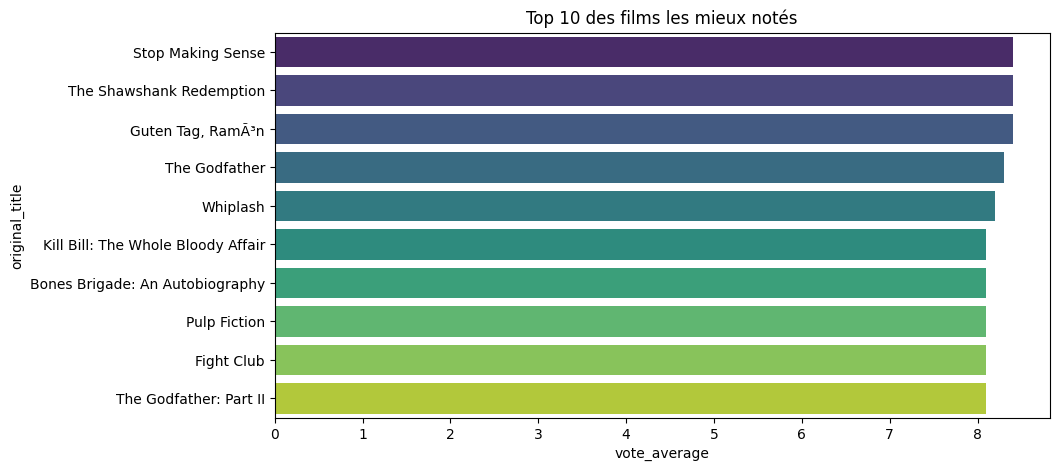

In [177]:
plt.figure(figsize=(10, 5))
sns.barplot(y='original_title', x='vote_average', data=top10, palette='viridis')
plt.title('Top 10 des films les mieux notés')

**Q2 - Quels sont les genres les plus présents ?**

/tmp/ipython-input-2063247309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genres', data=df, order=genre_counts.index, palette='viridis')


Text(0.5, 1.0, 'Nombre de films par genre')

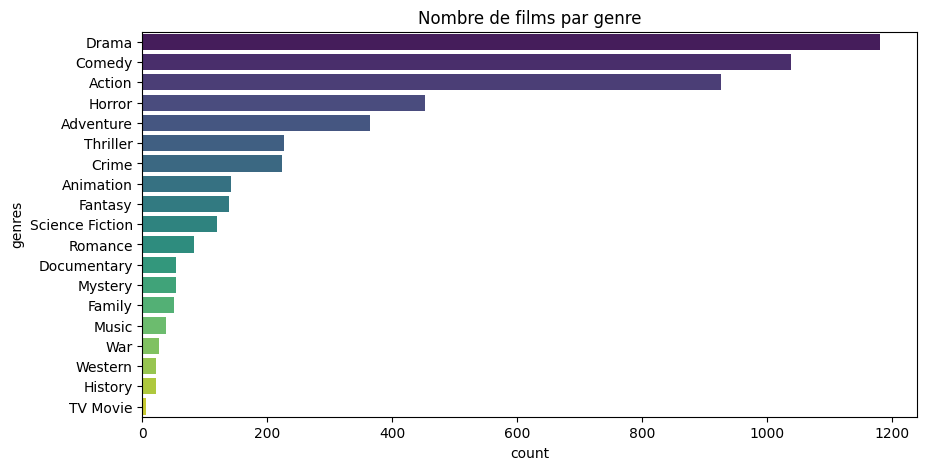

In [178]:
plt.figure(figsize=(10, 5))
genre_counts = df['genres'].value_counts()
sns.countplot(y='genres', data=df, order=genre_counts.index, palette='viridis')
plt.title('Nombre de films par genre')



---


**Q3 - Quels genres sont les mieux notés par les spectateurs ?**

Text(0.5, 1.0, 'Vote moyen par genre')

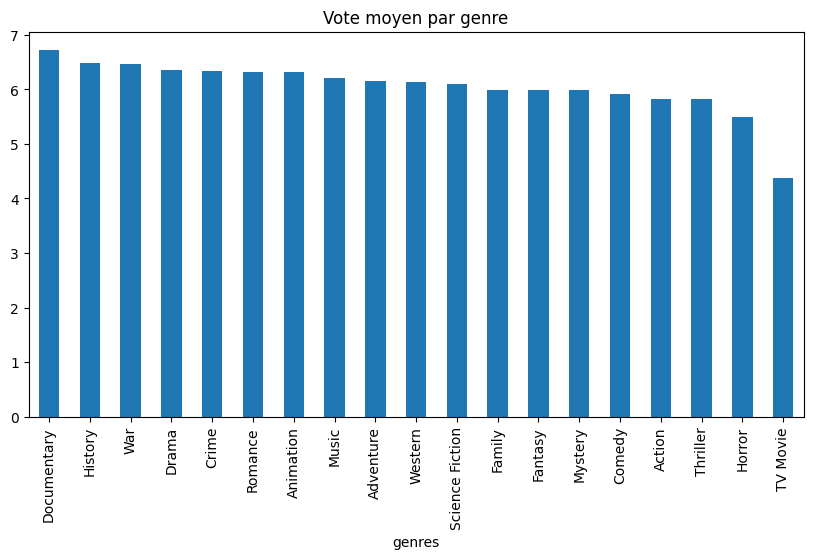

In [179]:
plt.figure(figsize=(10, 5))
df.groupby('genres')['vote_average'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Vote moyen par genre')
#sns.barplot(x='genres', y='vote_average', data=df, palette='viridis')
plt.title('Vote moyen par genre')

**Q4 - Quels films ont généré le plus de revenus ?**

In [180]:
top10 = df.sort_values('revenue', ascending=False).head(10)
top10[['genres','original_title', 'revenue']]

,genres,original_title,revenue
1386,Action,Avatar,2781505847
3,Action,Star Wars: The Force Awakens,2068178225
5231,Drama,Titanic,1845034188
4361,Science Fiction,The Avengers,1519557910
0,Action,Jurassic World,1513528810
4,Action,Furious 7,1506249360
14,Action,Avengers: Age of Ultron,1405035767
3374,Adventure,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Animation,Frozen,1274219009
5425,Action,Iron Man 3,1215439994


**Q5 - Quels genres ont généré le plus de profit**

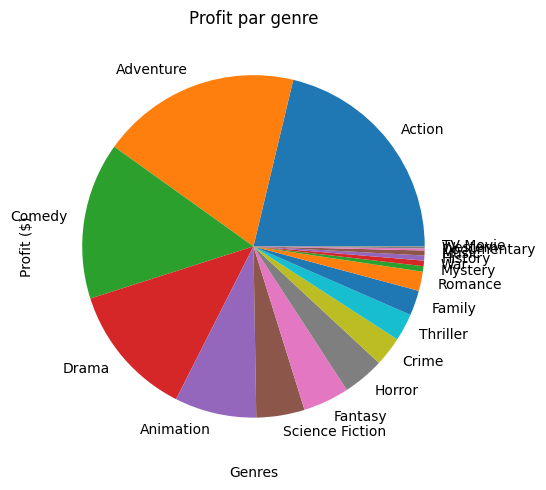

In [181]:
plt.figure(figsize=(15, 5))
gh = df.groupby('genres')['profit'].sum().sort_values(ascending=False)
gh.plot(kind='pie')
plt.title('Profit par genre')
plt.ylabel("Profit ($)")
plt.xlabel("Genres")
plt.grid(True)
plt.tight_layout()

**Q6 - Quel est le profit pouvant etre généré en fonction de la moyenne des budget par genre ?**

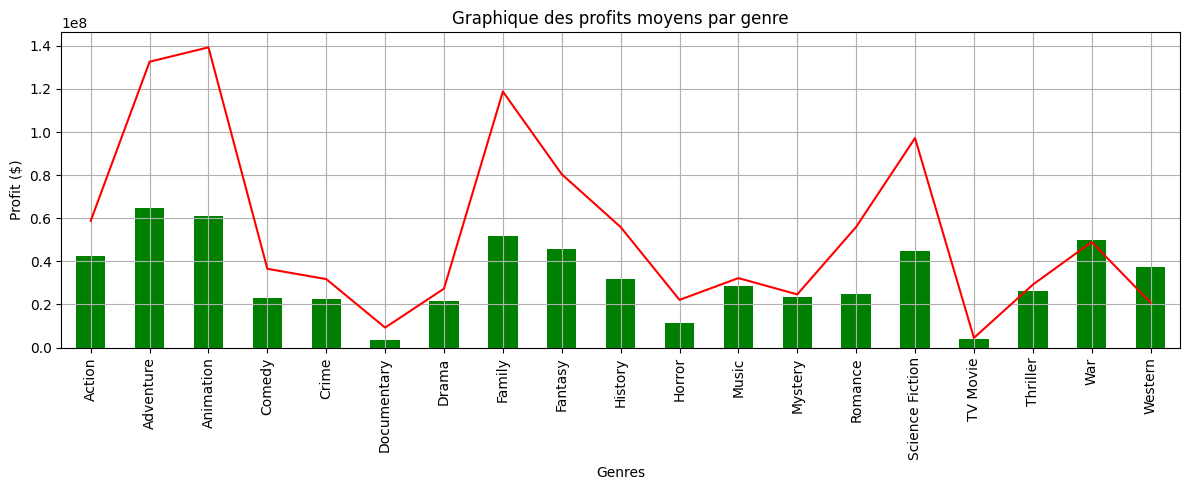

In [182]:
plt.figure(figsize=(12, 5))
df.groupby('genres')['profit'].mean().plot(kind='line', color='red')
gh = df.groupby('genres')['budget'].mean()
gh.plot(kind='bar', color='green')
plt.title('Graphique des profits moyens par genre')
plt.ylabel("Profit ($)")
plt.xlabel("Genres")
plt.grid(True)
plt.tight_layout()

**Q7 - Y'a t'il une correlation entre le budget d'un film et son revenue ?**

Text(0.5, 1.0, 'Budget vs Revenue')

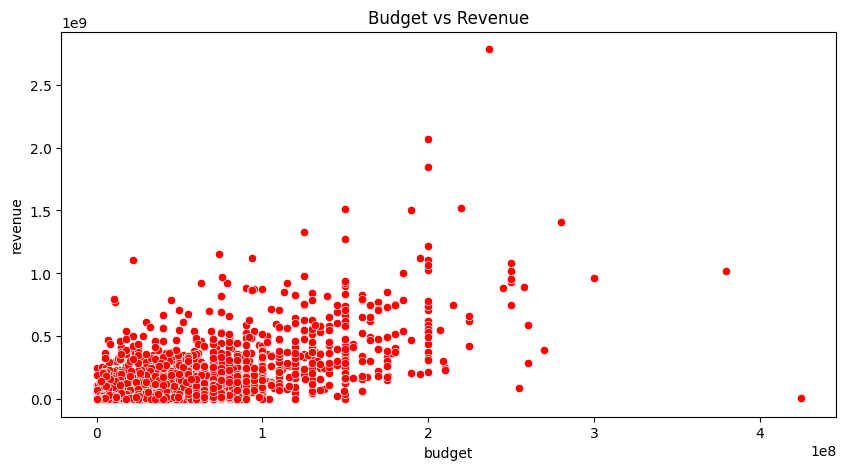

In [183]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='budget', y='revenue', data=df, color='red')
plt.title('Budget vs Revenue')

On constate que la distribution a tendance a croitre, alors il y'a bien une correlation entre un budget et le revenue généré

---



**Q8 - Catégorie de vote dans chaque genre**

Text(0.5, 1.0, 'Nombre de films par genre')

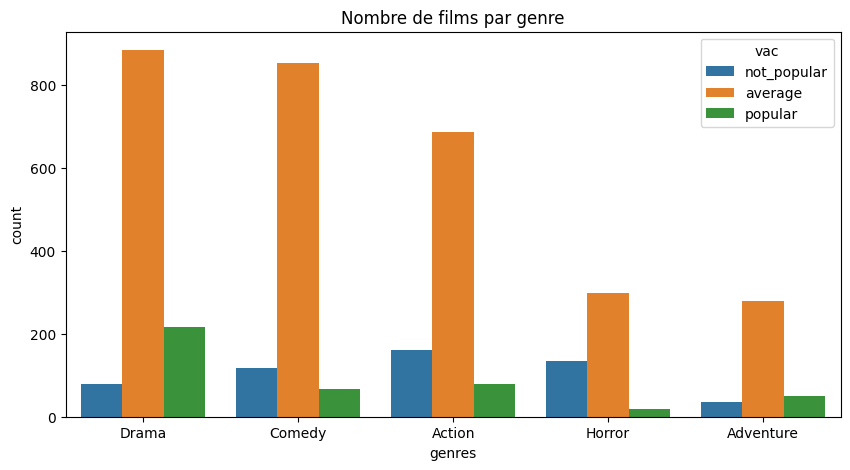

In [184]:
plt.figure(figsize=(10, 5))
data = df.genres.value_counts().head(5)
sns.countplot(x='genres', data=df, order=data.index, hue='vac')
plt.title('Nombre de films par genre')

# **CONCLUSION**
Ce jeu de données offre un large éventail de possibilités d'analyse. Comme nous l’avons vu à travers les différentes visualisations et métriques explorées, il est possible de tirer de nombreuses informations pertinentes à partir de simples opérations de filtrage, de groupement ou de représentation graphique.

D’autres questions peuvent naturellement être étudiées, telles que :

Quelle est la performance commerciale moyenne par décennie ?

Les réalisateurs les plus rentables ?

L’évolution des genres populaires au fil des années ?


L’idée reste la même : poser une question, filtrer les données pertinentes, explorer via Pandas et visualiser avec des outils comme Matplotlib ou Seaborn.

Ce type d’approche constitue une base essentielle pour tout data analyst souhaitant transformer des données brutes en informations exploitables.